<a href="https://colab.research.google.com/github/MitchPereira/sharing-github/blob/main/IRISClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task: To split Iris Dataset into three classes (Iris Setosa, Iris Virginica, and Iris Versicolor) based on four attributes: Sepal Length, Sepal Width, Petal Length, and Petal Width.



1. Import necessary libraries



In [1]:

import pandas as pd #Python Data Analysis Library
import numpy as np #Python Scientific Library


2.	Download dataset from a given URL and convert it into a dataset.

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
new_names = ['sepal_length','sepal_width','petal_length','petal_width','iris_class']
dataset = pd.read_csv(url, names=new_names, skiprows=0, delimiter=',')
dataset.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   iris_class    150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


3.	Use dataset.head(n) to display top n data.

In [3]:
dataset.head(6)

,sepal_length,sepal_width,petal_length,petal_width,iris_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


4.	Separate input features (x) and target class (y).



In [4]:
y = dataset['iris_class']
x = dataset.drop(['iris_class'], axis=1)

print ("dataset : ",dataset.shape)
print ("x : ",x.shape)
print ("y : ",y.shape)


dataset :  (150, 5)
x :  (150, 4)
y :  (150,)


5.	For the learning, we will use a Multi-Layer Perceptron (MLP) Classifier. We need to encode our target attribute for Neural Network based classifier into one hot format.

In [5]:
#one hot encoding
y=pd.get_dummies(y)
y.sample(7)


,Iris-setosa,Iris-versicolor,Iris-virginica
58,False,True,False
112,False,False,True
105,False,False,True
37,True,False,False
92,False,True,False
50,False,True,False
117,False,False,True


6.	Now that our input and target are ready, we can separate our training and testing set by using scikit learn method train_test_split().

In [7]:
#Selective import Scikit Learn
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3) #0.3 data as data test

#converting to float 32bit
x_train = np.array(x_train).astype(np.float32)
x_test  = np.array(x_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test  = np.array(y_test).astype(np.float32)

#print data split for validation
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(105, 4) (105, 3)
(45, 4) (45, 3)


7.	Train the model:
Our neural-net will be 4 x 10 x 5 x 3 so hidden layers are (10 units and 5 units).
Set our max iteration to 2000 to train for 2000 epoch, and learning rate to 0.01.
Random_state is used as a random seed so we can get the same output.


In [9]:
#importing our model
from sklearn.neural_network import MLPClassifier

#model initialization
Model = MLPClassifier(hidden_layer_sizes=(10,5), max_iter=2000, alpha=0.01,                     solver='sgd', random_state=121)

#train our model
h=Model.fit(x_train,y_train)

#use our model to predict
y_pred=Model.predict(x_test)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


8.	Get our classification report and show results in confusion matrix and accuracy you also need to import them from sklearn.matrix.

In [10]:
#scikit for machine learning reporting
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(classification_report(y_test,y_pred)) # Print summary report
print(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
print('accuracy is ',accuracy_score(y_pred,y_test)) # Print accuracy score


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.93      0.88      0.90        16
           2       0.88      1.00      0.94        15

   micro avg       0.93      0.96      0.95        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.94      0.96      0.94        45
 samples avg       0.93      0.96      0.94        45

[[14  0  0]
 [ 1 14  1]
 [ 0  1 14]]
accuracy is  0.9111111111111111


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


9.	Plot loss_curve_ property of our trained model.

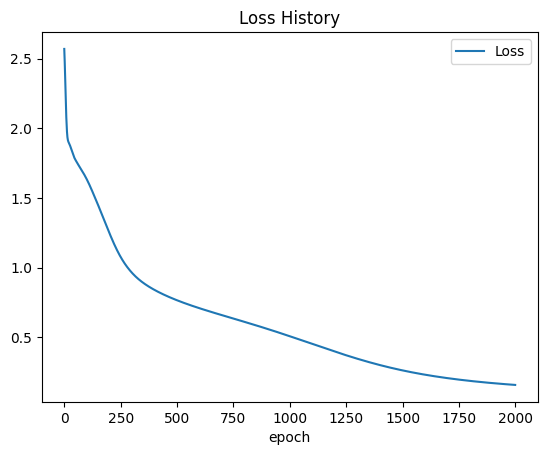

In [12]:
import matplotlib.pyplot as plt
plt.plot(h.loss_curve_)
plt.title('Loss History')
plt.xlabel('epoch')
plt.legend(['Loss'])
